# Window Function Test

/Users/ytcheng/ciber/python_ciber/stack_modelfit/make_maps_RMF.py:57: RuntimeWarning: divide by zero encountered in log10
  amplitude = 10**spline_cl_g(np.log10(ls))
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/ciber/python_ciber

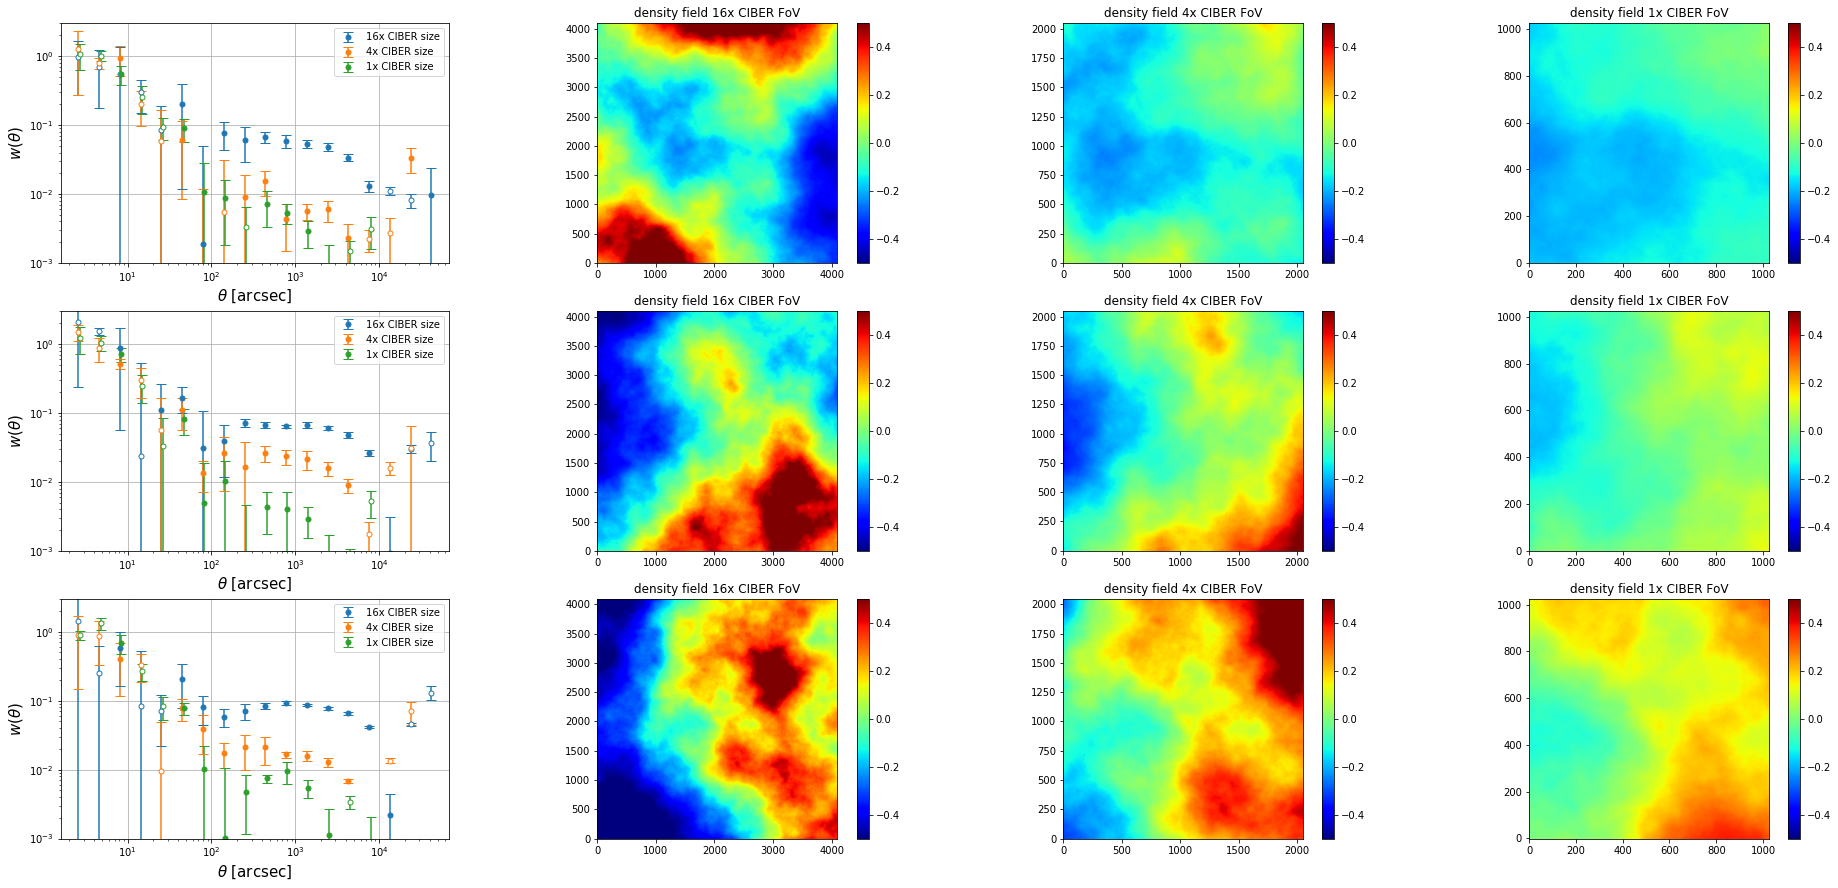

In [21]:
from astropy import units as u
from utils import *
from clustering import *
from make_maps_RMF import *

ells = np.logspace(1,5,100)
logx, logy =np.array([np.log10(1e2),np.log10(1e3)]), np.array([np.log10(100),np.log10(1)])
x, y = 10**logx, 10**logy
logCl = scipy.interpolate.InterpolatedUnivariateSpline(logx, logy, k=1)
cl = 10**logCl(np.log10(ells))
cl = cl/1e7

ell_min = 90
Npix = 1024
deg_pix = 2/Npix
fig, ax = plt.subplots(3,4,figsize=(32,15))
for i in range(3):
    upscale = 4
    counts4, density_fields4 = generate_count_map_2d(1,
                                                   ell_min=ell_min/upscale,
                                                   cl=cl, 
                                                   ell_sampled=ells,
                                                   size=Npix*upscale,
                                                  Ntot=10000)
    ra4, dec4 = positions_from_counts(counts4[0])
    ra4 = (ra4 - (Npix*upscale-1)/2) * deg_pix
    dec4 = (dec4 - (Npix*upscale-1)/2) * deg_pix

    upscale = 2
    density_fields2 = density_fields4[:,density_fields4.shape[1]//4:density_fields4.shape[1]//4*3+1,
                     density_fields4.shape[1]//4:density_fields4.shape[1]//4*3+1]    
    counts2 = counts_from_density_2d(density_fields2, Ntot=10000)
    ra2, dec2 = positions_from_counts(counts2[0])
    ra2 = (ra2 - (Npix*upscale-1)/2) * deg_pix
    dec2 = (dec2 - (Npix*upscale-1)/2) * deg_pix

    upscale = 1
    density_fields1 = density_fields2[:,density_fields2.shape[1]//4:density_fields2.shape[1]//4*3+1,
                     density_fields2.shape[1]//4:density_fields2.shape[1]//4*3+1]    
    counts1 = counts_from_density_2d(density_fields1, Ntot=10000)
    ra1, dec1 = positions_from_counts(counts1[0])
    ra1 = (ra1 - (Npix*upscale-1)/2) * deg_pix
    dec1 = (dec1 - (Npix*upscale-1)/2) * deg_pix


    theta_binedges_arcsec = np.logspace(0.3,5,20) # arcsec
    theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
    theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])
    corr1, dcorr1, _ = get_angular_2pt_func(ra1, dec1, theta_binedges_deg, nboot=5)
    corr2, dcorr2, _ = get_angular_2pt_func(ra2, dec2, theta_binedges_deg, nboot=5)
    corr4, dcorr4, _ = get_angular_2pt_func(ra4, dec4, theta_binedges_deg, nboot=5)

    ax[i][0].errorbar(theta_bins[corr4>=0]*0.98, corr4[corr4>=0], dcorr4[corr4>=0],
                fmt='.', color='C'+str(0),capsize=5, markersize=10, alpha=1, label='16x CIBER size')
    ax[i][0].errorbar(theta_bins[corr4<0]*0.98, -corr4[corr4<0], dcorr4[corr4<0],
                fmt='.', mfc='white', color='C'+str(0),capsize=5, markersize=10, alpha=1)

    ax[i][0].errorbar(theta_bins[corr2>=0]*0.98, corr2[corr2>=0], dcorr2[corr2>=0],
                fmt='.', color='C'+str(1),capsize=5, markersize=10, alpha=1, label='4x CIBER size')
    ax[i][0].errorbar(theta_bins[corr2<0]*0.98, -corr2[corr2<0], dcorr2[corr2<0],
                fmt='.', mfc='white', color='C'+str(1),capsize=5, markersize=10, alpha=1)

    ax[i][0].errorbar(theta_bins[corr1>=0]*1.02, corr1[corr1>=0], dcorr1[corr1>=0],
                fmt='.', color='C'+str(2),capsize=5, markersize=10, alpha=1, label='1x CIBER size')
    ax[i][0].errorbar(theta_bins[corr1<0]*1.02, -corr1[corr1<0], dcorr1[corr1<0],
                fmt='.', mfc='white', color='C'+str(2),capsize=5, markersize=10, alpha=1)


    ax[i][0].set_xscale('log')
    ax[i][0].set_yscale('log')
    ax[i][0].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
    ax[i][0].set_ylabel(r'$w(\theta)$', fontsize=15)
    ax[i][0].legend()
    ax[i][0].set_ylim([1e-3,3e0])
    ax[i][0].grid()

    imageclip(density_fields4[0], ax=ax[i][1], vmin=-0.5, vmax=0.5)
    ax[i][1].set_title('density field 16x CIBER FoV')
    imageclip(density_fields2[0], ax=ax[i][2], vmin=-0.5, vmax=0.5)
    ax[i][2].set_title('density field 4x CIBER FoV')
    imageclip(density_fields1[0], ax=ax[i][3], vmin=-0.5, vmax=0.5)
    ax[i][3].set_title('density field 1x CIBER FoV')
    
plt.savefig('/Users/ytcheng/Desktop/wgg_window_test.png', dpi = 150, bbox_inches='tight')

In [1]:
from lognormal_counts_yunting import *

In [2]:
ng_bins=1 # this is the number of redshift bins you want, if you want to generate several GRFs and superpose them
zmin=0.01
zmax=1.0
n_catalog = 1
number_counts = [5000] # you want this to be in counts per square degree, since it gets multiplied by n_square_deg 
                        # in the function below. you might get a values from the helgason model

ell_min = 90
Npix = 1024
deg_pix = 2/Npix

upscale = 4
size = Npix*upscale # side length of image to place counts in 
n_square_deg = (2*upscale)**2

In [3]:
# generate the clustering catalog. check the defaults to 
#make sure they are what you want, especially with ell_min and the like.
tx, ty, grfs = generate_galaxy_clustering(number_counts, size=size, 
                                    ell_min=ell_min/upscale, n_square_deg=n_square_deg, 
                                    n_catalog=n_catalog, ng_bins=ng_bins, return_grf=True)

cat = np.array([tx[0], ty[0]]).transpose()
gmap_unnormalized = make_galaxy_cts_map(cat, [size, size], normalize=False)

/Users/ytcheng/ciber/python_ciber/stack_modelfit/lognormal_counts_yunting.py:66: RuntimeWarning: divide by zero encountered in log10
  amplitude = 10**spline_cl_g(np.log10(ls))


In [4]:
from clustering import *

ra = (np.array(tx[0]) - (Npix*upscale-1)/2) * deg_pix
dec = (np.array(ty[0]) - (Npix*upscale-1)/2) * deg_pix

ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                             (min(dec), max(dec)),
                             2 * len(ra))

D_idx = np.where((ra > -1) & (ra < 1) & (dec > -1) & (dec < 1))[0]
R_idx = np.where((ra_R > -1) & (ra_R < 1) & (dec_R > -1) & (dec_R < 1))[0]

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])

corr, corr_in, corr_err, corr_err_in, bootstraps\
= bootsrap_two_point_angular_window([ra, dec], [ra_R, dec_R],
                                                    theta_binedges_deg, D_idx, R_idx,Nbootstrap=3)

corr_in_only, corr_in_only_err, _ = get_angular_2pt_func\
                (ra[D_idx], dec[D_idx], theta_binedges_deg, nboot=3)

corr_subs = []
for ra_min, ra_max in zip(np.arange(-4,4,2), np.arange(-4,4,2)+2):
        for dec_min, dec_max in zip(np.arange(-4,4,2), np.arange(-4,4,2)+2):
            sp = np.where((ra > ra_min) & (ra < ra_max) & (dec > dec_min) & (dec < dec_max))[0]
            corr_sub = get_angular_2pt_func\
                            (ra[sp], dec[sp], theta_binedges_deg, nboot=1)
            corr_subs.append(corr_sub)

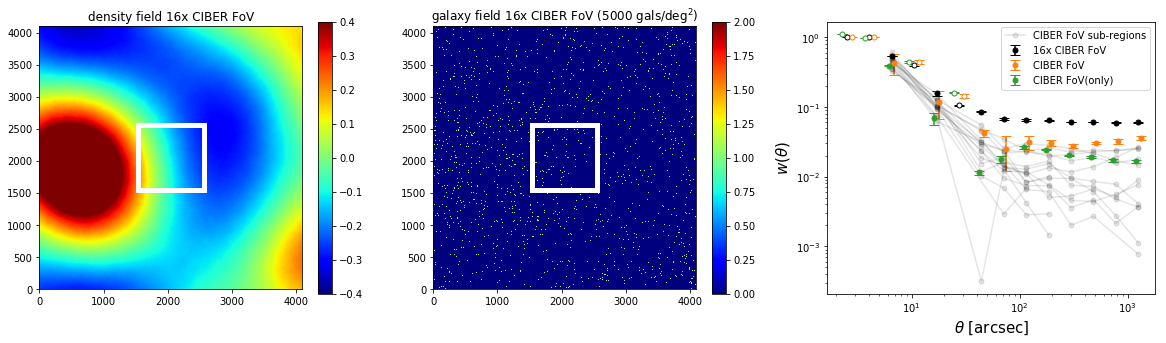

In [7]:
from utils_plotting import *
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1,3, figsize=(20,5))
imageclip(grfs[0][0], vmin=-0.4, vmax=0.4, ax=ax[0])
imageclip(gmap_unnormalized, vmin=0, vmax=2, ax=ax[1])
ax[0].add_patch(Rectangle((1024*1.5,1024*1.5), 1024, 1024, fill=None, alpha=1,lw=5,color='w'))
ax[1].add_patch(Rectangle((1024*1.5,1024*1.5), 1024, 1024, fill=None, alpha=1,lw=5,color='w'))
ax[0].set_title('density field 16x CIBER FoV')
ax[1].set_title('galaxy field 16x CIBER FoV (%d gals/deg$^2$)'%number_counts[0])

ax[2].errorbar(theta_bins, corr, corr_err, 
             fmt='.', color='k',capsize=5, markersize=10, label='16x CIBER FoV')
ax[2].errorbar(theta_bins, -corr, corr_err, 
             fmt='.', mfc='white', color='k',capsize=5, markersize=10)
for i in range(len(corr_subs)):
    sp = np.where(corr_subs[i]>0)[0]
    if i==0:
        ax[2].loglog(theta_bins[sp], corr_subs[i][sp], '.-', color='k',
                     markersize=10, alpha=0.1, label='CIBER FoV sub-regions')
    else:
        ax[2].loglog(theta_bins[sp], corr_subs[i][sp], '.-', color='k',
                     markersize=10, alpha=0.1)
        
ax[2].errorbar(theta_bins*1.05, corr_in, corr_err_in, 
             fmt='.', color='C1',capsize=5, markersize=10,label='CIBER FoV')
ax[2].errorbar(theta_bins[corr_in<0]*1.1, -corr_in[corr_in<0], corr_err_in[corr_in<0], 
             fmt='.', mfc='white', color='C1',capsize=5, markersize=10)
ax[2].errorbar(theta_bins*0.95, corr_in_only, 
             corr_err, fmt='.', color='C2',capsize=5, markersize=10,label='CIBER FoV(only)')
ax[2].errorbar(theta_bins[corr_in_only<0]*0.9, -corr_in_only[corr_in_only<0], 
             corr_err[corr_in_only<0], fmt='.', mfc='white', color='C2',capsize=5, markersize=10)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax[2].set_ylabel(r'$w(\theta)$', fontsize=15)
ax[2].legend()

plt.savefig('/Users/ytcheng/Desktop/window_test', dpi = 200, bbox_inches='tight')

# Calculate the window from theory
calculate frac of area out of field for each radial bin

In [23]:
from utils import *

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])

f_arr = []
for ibin in range(len(theta_bins)):
    Npix_expected = np.pi*(theta_binedges_arcsec[ibin+1]**2 \
                           - theta_binedges_arcsec[ibin]**2)/7**2
    Ntot, Nin = 0, 0
    for x in np.arange(0,1024,25):
        for y in np.arange(0,1024,25):
            radmap = make_radius_map(np.zeros([1024,1024]), x, y)*7
            sp = np.where((radmap>theta_binedges_arcsec[ibin]) & \
                         (radmap<theta_binedges_arcsec[ibin+1]))
            Ntot += Npix_expected
            Nin += len(sp[0])
            
    f_arr.append(Nin / Ntot)

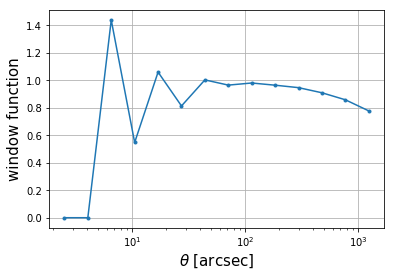

In [26]:
plt.semilogx(theta_bins,f_arr,'.-')
plt.xlabel(r'$\theta$ [arcsec]', fontsize=15)
plt.ylabel('window function', fontsize=15)
plt.grid()
plt.savefig('/Users/ytcheng/Desktop/window_theory', dpi = 200, bbox_inches='tight')

# 210 sims w/ theoretical area frac calculation

In [5]:
# from run_window_sim import *
# data = run_window_sim(0,n_catalog=2, counts_per_sqdeg=50)

In [56]:
f_arr = []
Ntot_arr, Nin_arr = np.zeros(len(theta_bins)), np.zeros(len(theta_bins))
for x in np.arange(0,1024,25):
    for y in np.arange(0,1024,25):
        radmap = make_radius_map(np.zeros([1024,1024]), x, y)*7
        for ibin in range(len(theta_bins)):
            Npix_expected = np.pi*(theta_binedges_arcsec[ibin+1]**2 \
                                   - theta_binedges_arcsec[ibin]**2)/7**2
            sp = np.where((radmap>theta_binedges_arcsec[ibin]) & \
                         (radmap<theta_binedges_arcsec[ibin+1]))
            Ntot_arr[ibin] += Npix_expected
            Nin_arr[ibin] += len(sp[0])
            
frac_th = Nin_arr / Ntot_arr

In [58]:
from utils import *
import os

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])

corrs, corr_ins, corr_in_onlys, fracs_d, fracs_a = [], [], [], [], []
for fname in os.listdir('./wfunc_data'):
    if 'wfunc' not in fname or 'n_catalog100' in fname:
        continue
    data = np.load('./wfunc_data/'+fname)
    for i in range(data.shape[1]):    
        corr, corr_in, corr_in_only, frac_a = data[0,i,:], data[1,i,:], data[2,i,:], data[3,i,:]
        corrs.append(corr)
        corr_ins.append(corr_in)
        corr_in_onlys.append(corr_in_only)
        fracs_d.append(corr_in_only/corr_in)
        fracs_a.append(frac_a)

corrs = np.array(corrs)
corr_ins = np.array(corr_ins)
corr_in_onlys = np.array(corr_in_onlys)
fracs_d = np.array(fracs_d)
fracs_a = np.array(fracs_a)

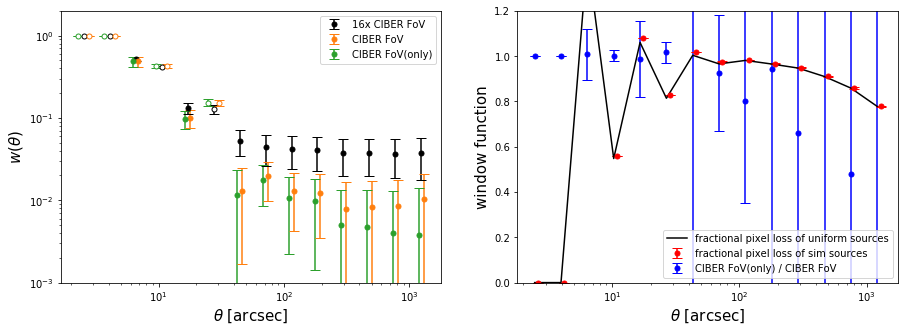

In [64]:
from utils_plotting import *

corr, corr_err = np.mean(corrs, axis=0), np.std(corrs, axis=0)
corr_in, corr_err_in = np.mean(corr_ins, axis=0), np.std(corr_ins, axis=0)
corr_in_only, corr_in_only_err = np.mean(corr_in_onlys, axis=0), np.std(corr_in_onlys, axis=0)
frac_d, frac_d_err = np.mean(fracs_d, axis=0), np.std(fracs_d, axis=0)
frac_a, frac_a_err = np.mean(fracs_a, axis=0), np.std(fracs_a, axis=0)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(theta_bins, corr, corr_err, 
             fmt='.', color='k',capsize=5, markersize=10, label='16x CIBER FoV')
ax[0].errorbar(theta_bins, -corr, corr_err, 
             fmt='.', mfc='white', color='k',capsize=5, markersize=10)
        
ax[0].errorbar(theta_bins*1.05, corr_in, corr_err_in, 
             fmt='.', color='C1',capsize=5, markersize=10,label='CIBER FoV')
ax[0].errorbar(theta_bins[corr_in<0]*1.1, -corr_in[corr_in<0], corr_err_in[corr_in<0], 
             fmt='.', mfc='white', color='C1',capsize=5, markersize=10)
ax[0].errorbar(theta_bins*0.95, corr_in_only, 
             corr_in_only_err, fmt='.', color='C2',capsize=5, markersize=10,label='CIBER FoV(only)')
ax[0].errorbar(theta_bins[corr_in_only<0]*0.9, -corr_in_only[corr_in_only<0], 
             corr_in_only_err[corr_in_only<0], fmt='.', mfc='white', color='C2',capsize=5, markersize=10)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-3,2e0])
ax[0].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax[0].set_ylabel(r'$w(\theta)$', fontsize=15)
ax[0].legend()

ax[1].errorbar(theta_bins*1.03, frac_a, frac_a_err, 
             fmt='.', color='r',capsize=5, markersize=10,
              label='fractional pixel loss of sim sources')
ax[1].errorbar(theta_bins*0.97, frac_d, frac_d_err, 
             fmt='.', color='b',capsize=5, markersize=10,
              label='CIBER FoV(only) / CIBER FoV')
ax[1].plot(theta_bins*0.97, frac_th, color='k',
           label='fractional pixel loss of uniform sources')
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax[1].set_ylabel('window function', fontsize=15)
ax[1].set_ylim([0,1.2])
ax[1].legend()
plt.savefig('/Users/ytcheng/Desktop/window_test_avg', dpi = 150, bbox_inches='tight')

# 700 sims w/o theoretical area frac calculation

In [50]:
from utils import *
import os

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])

corrs, corr_ins, corr_in_onlys, ratios = [], [], [], []
for fname in os.listdir('./wfunc_data'):
    if 'wfunc' not in fname or 'n_catalog100' not in fname:
        continue
    data = np.load('./wfunc_data/'+fname)
    for i in range(data.shape[1]):    
        corr, corr_in, corr_in_only = data[0,i,:], data[1,i,:], data[2,i,:]
        corrs.append(corr)
        corr_ins.append(corr_in)
        corr_in_onlys.append(corr_in_only)
        ratios.append(corr_in_only/corr_in)

corrs = np.array(corrs)
corr_ins = np.array(corr_ins)
corr_in_onlys = np.array(corr_in_onlys)
ratios = np.array(ratios)

(0, 1.2)

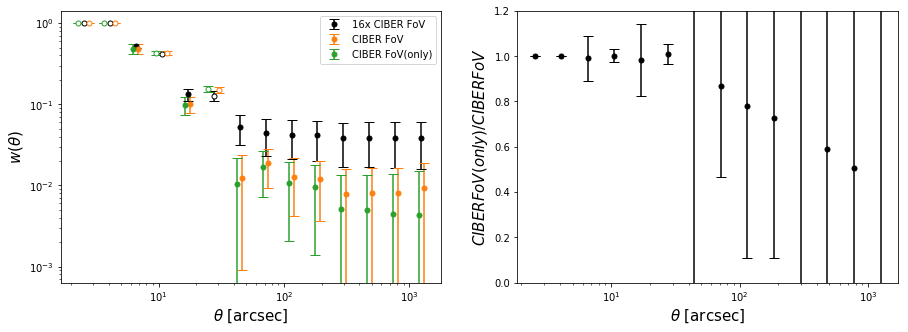

In [51]:
from utils_plotting import *

corr, corr_err = np.mean(corrs, axis=0), np.std(corrs, axis=0)
corr_in, corr_err_in = np.mean(corr_ins, axis=0), np.std(corr_ins, axis=0)
corr_in_only, corr_in_only_err = np.mean(corr_in_onlys, axis=0), np.std(corr_in_onlys, axis=0)
ratio, ratio_err = np.mean(ratios, axis=0), np.std(ratios, axis=0)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(theta_bins, corr, corr_err, 
             fmt='.', color='k',capsize=5, markersize=10, label='16x CIBER FoV')
ax[0].errorbar(theta_bins, -corr, corr_err, 
             fmt='.', mfc='white', color='k',capsize=5, markersize=10)
        
ax[0].errorbar(theta_bins*1.05, corr_in, corr_err_in, 
             fmt='.', color='C1',capsize=5, markersize=10,label='CIBER FoV')
ax[0].errorbar(theta_bins[corr_in<0]*1.1, -corr_in[corr_in<0], corr_err_in[corr_in<0], 
             fmt='.', mfc='white', color='C1',capsize=5, markersize=10)
ax[0].errorbar(theta_bins*0.95, corr_in_only, 
             corr_in_only_err, fmt='.', color='C2',capsize=5, markersize=10,label='CIBER FoV(only)')
ax[0].errorbar(theta_bins[corr_in_only<0]*0.9, -corr_in_only[corr_in_only<0], 
             corr_in_only_err[corr_in_only<0], fmt='.', mfc='white', color='C2',capsize=5, markersize=10)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax[0].set_ylabel(r'$w(\theta)$', fontsize=15)
ax[0].legend()

ax[1].errorbar(theta_bins, ratio, ratio_err, 
             fmt='.', color='k',capsize=5, markersize=10)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax[1].set_ylabel(r'$CIBER FoV(only) / CIBER FoV$', fontsize=15)
ax[1].set_ylim([0,1.2])
# plt.savefig('/Users/ytcheng/Desktop/window_test_avg', dpi = 200, bbox_inches='tight')

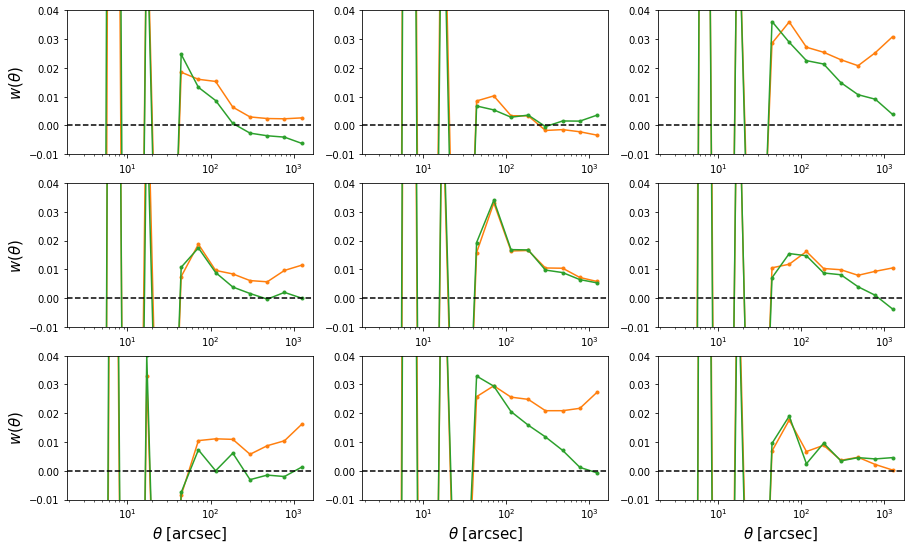

In [52]:
fig, ax = plt.subplots(3,3, figsize=(15,9))
for i in range(9):
    ax[i%3][i//3].semilogx(theta_bins, corr_ins[i], 'C1.-')
    ax[i%3][i//3].semilogx(theta_bins, corr_in_onlys[i], 'C2.-')
    ax[i%3][i//3].set_ylim([-0.01,0.04])
    ax[i%3][i//3].axhline(0,c='k',ls='--')
    ax[-1][i%3].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
    ax[i//3][0].set_ylabel(r'$w(\theta)$', fontsize=15)
# plt.savefig('/Users/ytcheng/Desktop/window_test', dpi = 200, bbox_inches='tight')